# Graduate Rotational Internship Program

## The Sparks Foundation

### Data Science & Business Analytics

#### <u> Task 1 - Prediction using Supervised ML </u>

##### Author : Titli Banerjee
##### Date : 06/03/2021

This is a simple linear regression task consisting of 2 variables- Hours and Score
<br>The task is to build a model that will predict the percentage of a student based on the no.of hours of study

### Importing the libraries and loading the dataset

In [1]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# reading csv file from url into a dataframe
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Finished reading data")

Finished reading data


### Exploratory data analysis

In [3]:
# checking the dimension of the dataframe
data.shape

(25, 2)

In [4]:
# checking the first 5 records of the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# getting more information bout the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# checking the summary statistics of the variables
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


### Data Visualizations

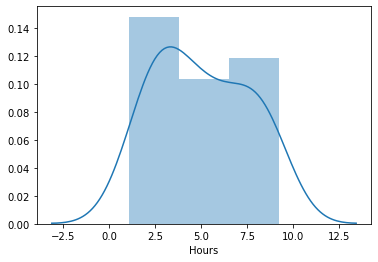

In [7]:
# Check the distribution of Hours variable
sns.distplot(data['Hours'], kde=True)

<b> Hours is somewhat normally distributed with maximum number of students studying around 2.5hrs to 5hrs 

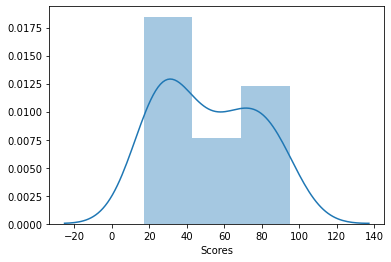

In [8]:
# Check the distribution of Scores variable
sns.distplot(data['Scores'], kde=True)

<b> Scores are also somewhat normally distributed with majority students scoring between 20 to 40 percentage.

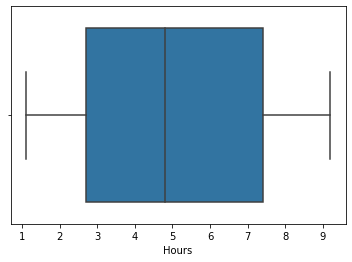

In [9]:
# plot the hours in a boxplot to check for any outliers
sns.boxplot(data['Hours'])

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


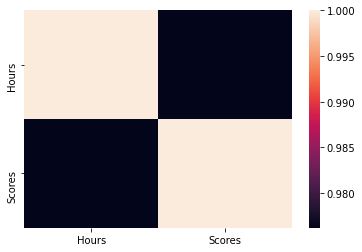

In [10]:
# check the correlation between the variables
sns.heatmap(data.corr())
print(data.corr())

#### We can see that the variables Hours and Score have high positive correlation

[Text(0.5, 1.0, 'Hours vs Scores')]

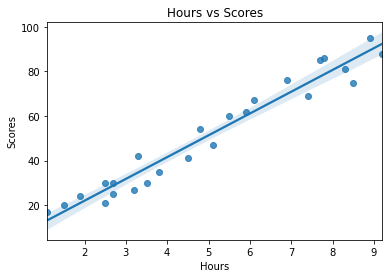

In [11]:
sns.regplot(x="Hours", y="Scores", data=data).set(title="Hours vs Scores")

### Model Implementation

In [12]:
# create the matrices of features and dependent variable
X = data.iloc[:, :-1].values
y= data.iloc[:, -1].values

In [13]:
# display X
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [23]:
# dislay y
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [25]:
# splitting the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [27]:
# no of data in X_train and y_train
print("Training set contains {} data".format(len(X_train)))

Training set contains 20 data


In [28]:
# no of data in X_test and y_test
print("Test set contains {} data".format(len(X_test)))

Test set contains 5 data


In [15]:
# creating a linear regressor object
lrm = LinearRegression()

In [16]:
# training the regressor using X_train and y_train
lrm.fit(X_train, y_train)

LinearRegression()

In [17]:
# checking the training accuracy of the model
train_pred = lrm.predict(X_train)
train_score = metrics.r2_score(y_train, train_pred)
print(train_score)

0.9515510725211552


In [18]:
# using the model to predict on the test data
y_pred = lrm.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [19]:
# visualising the actual and the predicted values in a table, to get a sence of how well the model performed
actual_vs_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'residual':abs(y_test - y_pred)})
print(actual_vs_pred)

   y_test     y_pred  residual
0      20  16.884145  3.115855
1      27  33.732261  6.732261
2      69  75.357018  6.357018
3      30  26.794801  3.205199
4      62  60.491033  1.508967


In [31]:
coeffecient = lrm.coef_
intercept = lrm.intercept_

print("Coeffecient : "+str(coeffecient))
print("Intercept : "+str(intercept))

Coeffecient : [9.91065648]
Intercept : 2.018160041434683


In [21]:
# calculating the r2_score of the predicted values of test data
pred_score = metrics.r2_score(y_test, y_pred)
print(pred_score)

0.9454906892105356


#### We see the r2 score is very high on the test data, which mean the model has performed very well. 
#### Now let's use the model to predict the percentage of a student who studies for 9.25 hours

In [22]:
# prediction 1

hours = [9.25]
score = lrm.predict([hours])
print("Score : {}".format(round(score[0],2)))

Score : 93.69


#### We can conclude that if a student studies for 9.25 hours, he is likely to score around 93.69 percentage, as per the model

#                    <b> ----------------------- Thank You -------------------------- </b>